<a href="https://colab.research.google.com/github/nou321/PFE_Nour/blob/main/GradCamKeras_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam

In [4]:
!pip install tf-keras-vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 3.7 MB/s eta 0:00:00


In [192]:
from tf_keras_vis.gradcam import Gradcam,GradcamPlusPlus
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear,ExtractIntermediateLayerForGradcam

replace2linear = ReplaceToLinear()

In [156]:
from google.colab import drive
drive.mount('/content/drive')
sj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj'
nsj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [214]:
image1=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/009.jpg")
image2=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/019.jpg")
image3=Image.open("/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/020.jpg")
img1=np.array(image1)
img2=np.array(image2)
img3=np.array(image3)
images=[img1,img2,img3]
img_tensor1 = preprocessing.image.img_to_array(img1)
X1 = np.expand_dims(img_tensor1, axis=0)
img_tensor2 = preprocessing.image.img_to_array(img2)
X2 = np.expand_dims(img_tensor2, axis=0)
img_tensor3 = preprocessing.image.img_to_array(img3)
X3 = np.expand_dims(img_tensor3, axis=0)


In [248]:
from tensorflow import keras
import cv2
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/ModelSjogren3splits.h5")
from PIL import Image
chemin_image = "/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/DATA_(512,512)/sj_data/019.jpg"
img=Image.open(chemin_image)
img=np.array(img)
img_tensor = preprocessing.image.img_to_array(img)
X = np.expand_dims(img_tensor, axis=0)
X.shape

(1, 512, 512, 1)

# GradCam

In [175]:
gradcam = Gradcam(model,model_modifier=replace2linear,clone=True)

In [203]:
from tf_keras_vis.utils.scores import CategoricalScore

# 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
score = CategoricalScore([0])


In [204]:
# Generate heatmap with GradCAM
cam = gradcam(score,
              img_tensor,
              penultimate_layer=-1)

In [182]:
from tf_keras_vis.utils import normalize
cam = normalize(cam)

In [183]:
# Render
heatmap =cam
heatmap.shape
heatmap.resize(512,512)

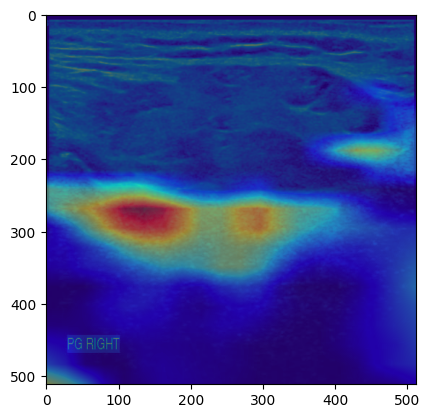

In [184]:
plt.imshow(img)
plt.imshow(heatmap, cmap='jet', alpha=0.5) # overlay
plt.show()

# smooth grad

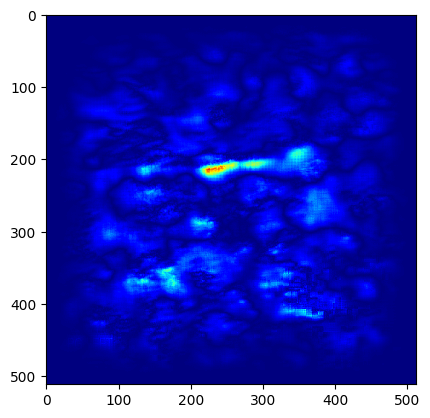

In [256]:
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize

# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=replace2linear,
                    clone=True)

# Generate saliency map
saliency_map = saliency(score, X)

## Since v0.6.0, calling `normalize()` is NOT necessary.
saliency_map.resize(512,512)
plt.imshow(saliency_map, cmap='jet')
plt.show()

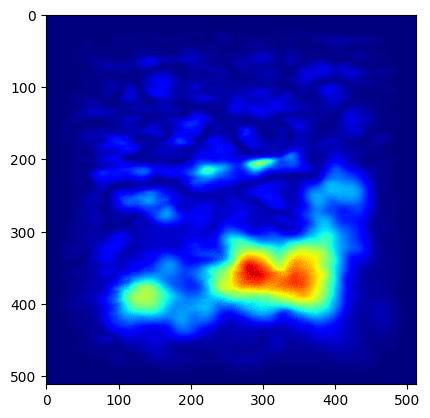

In [258]:
# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map2 = saliency(score,
                        X,
                        smooth_samples=50, # The number of calculating gradients iterations.
                        smooth_noise=0.2) # noise spread level.

## Since v0.6.0, calling `normalize()` is NOT necessary.
saliency_map2 = normalize(saliency_map2)
saliency_map2.resize(512,512)
# Render
plt.imshow(saliency_map2, cmap='jet')
plt.show()

#GradCamm ++

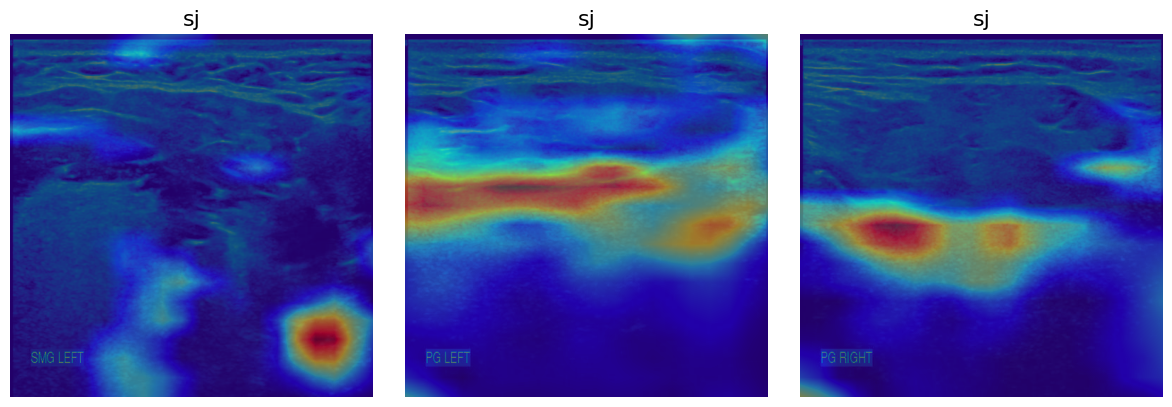

In [230]:
# Create GradCAM++ object
gradcam1 = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)

# Generate heatmap with GradCAM++
cam1 = gradcam(score,X1,penultimate_layer=-1)
cam2 = gradcam(score,X2,penultimate_layer=-1)
cam3 = gradcam(score,X3,penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)
cams=[cam1,cam2,cam3]
image_titles=["sj","sj","sj"]
# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap =cams[i]
    heatmap.resize(512,512)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# Faster-ScoreCAM

1/1 [==============================] - 0s 39ms/step


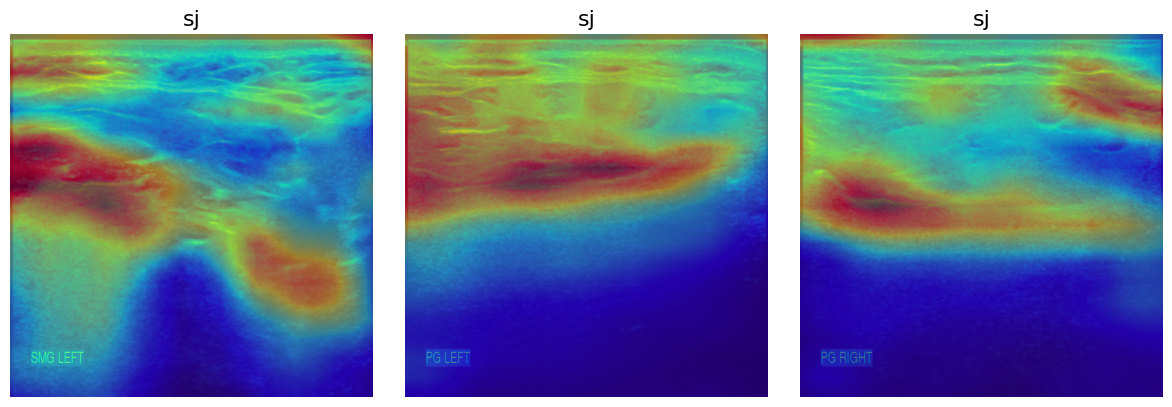

In [233]:
from tf_keras_vis.scorecam import Scorecam

# Create ScoreCAM object
scorecam = Scorecam(model, model_modifier=replace2linear)

# Generate heatmap with Faster-ScoreCAM
cam5 = scorecam(score,
               X1,
               penultimate_layer=-1,
               max_N=10)

cam6 = scorecam(score,
               X2,
               penultimate_layer=-1,
               max_N=10)
                
cam7 = scorecam(score,
               X3,
               penultimate_layer=-1,
               max_N=10)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

cams1=[cam5,cam6,cam7]
image_titles=["sj","sj","sj"]
# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = cams1[i]
    heatmap.resize(512,512)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

# score cam

1/1 [==============================] - 0s 43ms/step


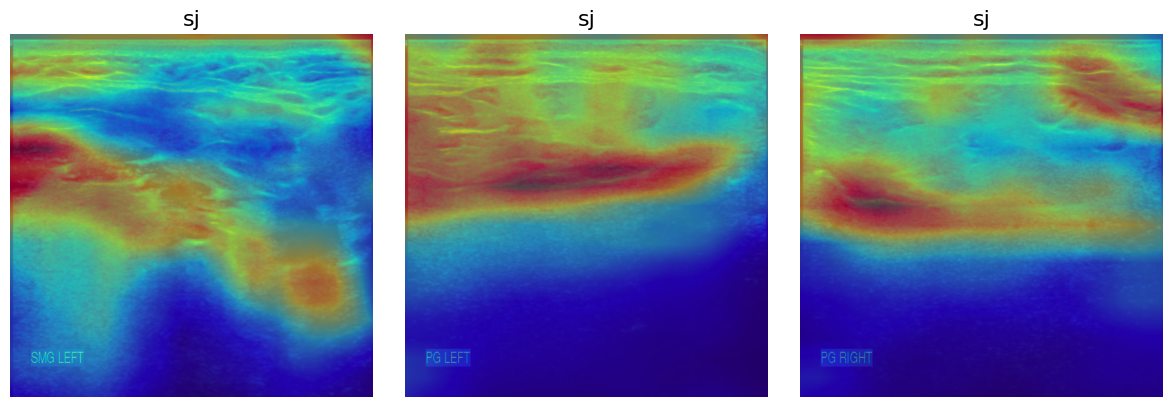

CPU times: user 4.26 s, sys: 113 ms, total: 4.38 s
Wall time: 4.55 s


In [236]:
%%time

from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.utils import num_of_gpus

# Create ScoreCAM object
scorecam = Scorecam(model)
# Generate heatmap with ScoreCAM
cam8 = scorecam(score, X1, penultimate_layer=-1)
cam9 = scorecam(score, X2, penultimate_layer=-1)
cam10 = scorecam(score, X3, penultimate_layer=-1)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# cam = normalize(cam)

# Render

cams2=[cam8,cam9,cam10]
image_titles=["sj","sj","sj"]
# Render
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = cams2[i]
    heatmap.resize(512,512)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

